2372.5
2512.5
140.0
lower_bound 2162.5
upper_bound 2722.5
Case 1: Monthly Expenses
Outliers: [3000, 10000]


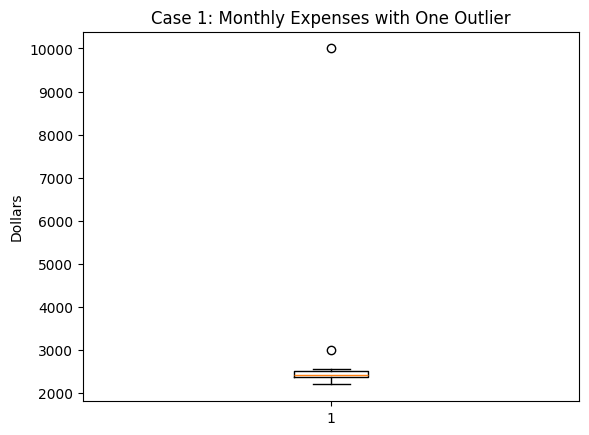

2.9625000000000004
3.1
0.13749999999999973
lower_bound 2.7562500000000005
upper_bound 3.3062499999999995

Case 2: Coffee Prices
Outliers: []


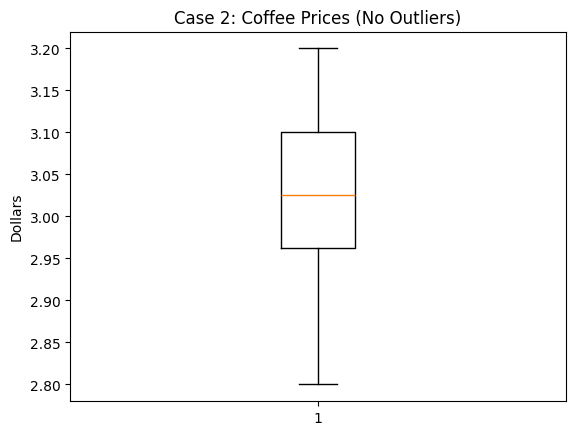

51.25
74.25
23.0
lower_bound 16.75
upper_bound 108.75

Case 3: Exam Scores
Outliers: [5, 8]


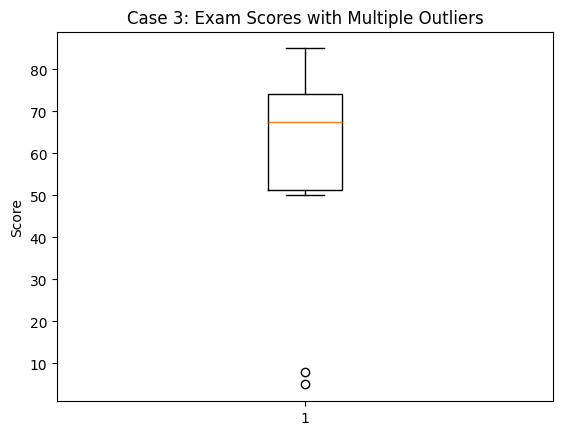

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    print(Q1)
    Q3 = np.percentile(data, 75)
    print(Q3)
    IQR = Q3 - Q1
    print(IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("lower_bound",lower_bound)
    print("upper_bound",upper_bound)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound

# -----------------------------
# Case 1: One Outlier
# Monthly expenses in dollars (one month had a huge hospital bill)
expenses = [2200, 2500, 2300, 2400, 2450, 2550, 2350, 2400, 2380, 2420, 3000, 10000]

outliers1, lb1, ub1 = detect_outliers_iqr(expenses)
print("Case 1: Monthly Expenses")
print("Outliers:", outliers1)

plt.boxplot(expenses)
plt.title("Case 1: Monthly Expenses with One Outlier")
plt.ylabel("Dollars")
plt.show()

# -----------------------------
# Case 2: No Outliers
# Daily coffee prices at a café ($)
coffee_prices = [2.8, 3.0, 3.1, 2.9, 3.2, 3.0, 3.1, 3.05, 2.95, 3.15]

outliers2, lb2, ub2 = detect_outliers_iqr(coffee_prices)
print("\nCase 2: Coffee Prices")
print("Outliers:", outliers2)

plt.boxplot(coffee_prices)
plt.title("Case 2: Coffee Prices (No Outliers)")
plt.ylabel("Dollars")
plt.show()

# -----------------------------
# Case 3: Multiple Outliers (both sides)
# Exam scores of students out of 100
scores = [5, 8, 50, 55,  65, 70, 72, 75,  82, 85]
outliers3, lb3, ub3 = detect_outliers_iqr(scores)
print("\nCase 3: Exam Scores")
print("Outliers:", outliers3)

plt.boxplot(scores)
plt.title("Case 3: Exam Scores with Multiple Outliers")
plt.ylabel("Score")
plt.show()

# How to Deal With Them


1. Remove Outliers

In [ ]:
import pandas as pd

# Example using IQR
Q1 = df['col'].quantile(0.25)
Q3 = df['col'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['col'] >= lower) & (df['col'] <= upper)]


2. Transform Data

In [ ]:
import numpy as np

df['log_col'] = np.log1p(df['col'])

3. Impute Outliers

Replace them with mean, median, or other statistics:

In [ ]:
median = df['col'].median()
df.loc[df['col'] > upper, 'col'] = median
df.loc[df['col'] < lower, 'col'] = median

4. Keep Them

They may be important

**Data Transformation**

**Encoding categorical variables**

1.   Label Encoding → Converts categories to numbers (e.g., Male=0, Female=1).
2.   One-Hot Encoding → Creates binary columns (e.g., Red=[1,0,0], Blue=[0,1,0], Green=[0,0,1]).

**Scaling numerical variables**


1.   Normalization (Min-Max Scaling) → Scales values between 0 and 1.
2.   Standardization (Z-score Scaling) → Converts to mean=0 and std=1.\
3.   Robust Scaling → Uses median & IQR (good when outliers exist).

**Binning**

1.  Converts continuous data into categories (e.g., age groups: Child, Adult, Senior).

# 1. Encoding Categorical Variables

a) Label Encoding

* Useful when categories have some order (like Low < Medium < High).

* Converts labels into numeric form.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Male']}
df = pd.DataFrame(data)

le = LabelEncoder()
df['Gender_Label'] = le.fit_transform(df['Gender'])
df


,Gender,Gender_Label
0,Male,1
1,Female,0
2,Female,0
3,Male,1
4,Male,1


b) One-Hot Encoding

* Useful for non-ordinal categories like Red, Blue, Green.

In [ ]:
df_colors = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']})
df_colors



,Color
0,Red
1,Blue
2,Green
3,Blue
4,Red


In [ ]:
df_onehot = pd.get_dummies(df_colors, columns=['Color'])
df_onehot

,Color_Blue,Color_Green,Color_Red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True


# 2. Scaling Numerical Variables

a) Normalization (Min-Max Scaling)

* Scales values into 0 → 1 range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

salaries = [[3000], [4000], [5000], [6000], [10000]]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(salaries)
print(scaled)


[[0.        ]
 [0.14285714]
 [0.28571429]
 [0.42857143]
 [1.        ]]


b) Standardization (Z-score Scaling)

* Centers data around mean=0 and std=1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(salaries)
print(scaled_std)


[[-1.07588766]
 [-0.66208471]
 [-0.24828177]
 [ 0.16552118]
 [ 1.82073295]]


c) Robust Scaling

* Better when outliers exist because it uses median and IQR.

In [ ]:
from sklearn.preprocessing import RobustScaler

salaries_with_outlier = [[3000], [4000], [5000], [6000], [100000]]
scaler_robust = RobustScaler()
scaled_robust = scaler_robust.fit_transform(salaries_with_outlier)
print(scaled_robust)


[[-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [47.5]]


# 🔹 3. Binning (Discretization)

Convert continuous values (like Age) into categories.

In [ ]:
ages = [5, 12, 17, 25, 40, 60, 75]
df_ages = pd.DataFrame({'Age': ages})

# Define bins
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df_ages['Age_Group'] = pd.cut(df_ages['Age'], bins=bins, labels=labels)
df_ages


,Age,Age_Group
0,5,Child
1,12,Child
2,17,Teen
3,25,Young Adult
4,40,Adult
5,60,Adult
6,75,Senior


# Graphs

1. Line Plot


What it shows: Trend over time (continuous data).

When to use: Stock prices, temperature over days, sales growth.

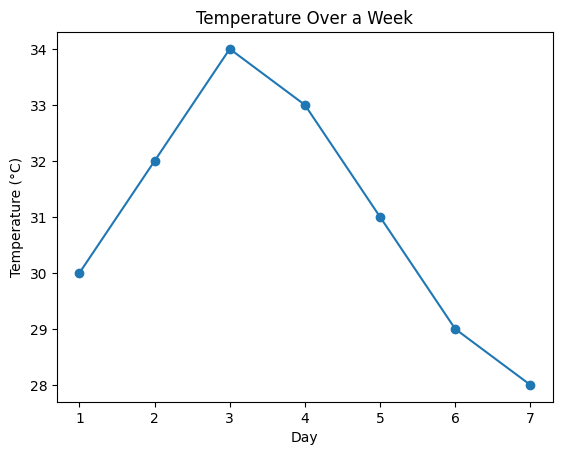

In [2]:
import matplotlib.pyplot as plt

# Example: Daily temperature
days = [1, 2, 3, 4, 5, 6, 7]
temp = [30, 32, 34, 33, 31, 29, 28]

plt.plot(days, temp, marker='o')
plt.title("Temperature Over a Week")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.show()


2. Bar Chart

What it shows: Comparison between categories.

When to use: Sales by product, population by country.

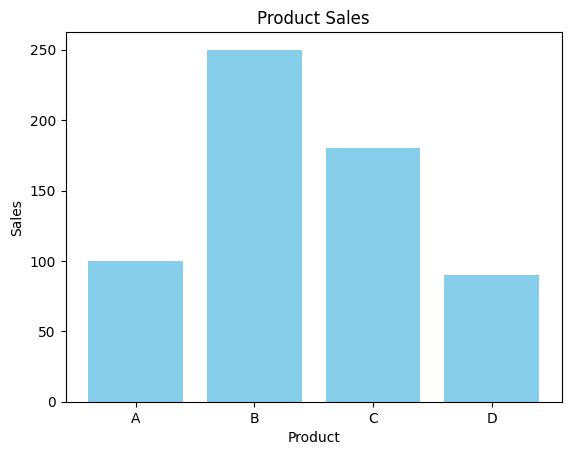

In [3]:
# Example: Sales of products
products = ["A", "B", "C", "D"]
sales = [100, 250, 180, 90]

plt.bar(products, sales, color='skyblue')
plt.title("Product Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()


3. Histogram

What it shows: Distribution of data (frequency).

When to use: Age distribution, exam scores, customer incomes.

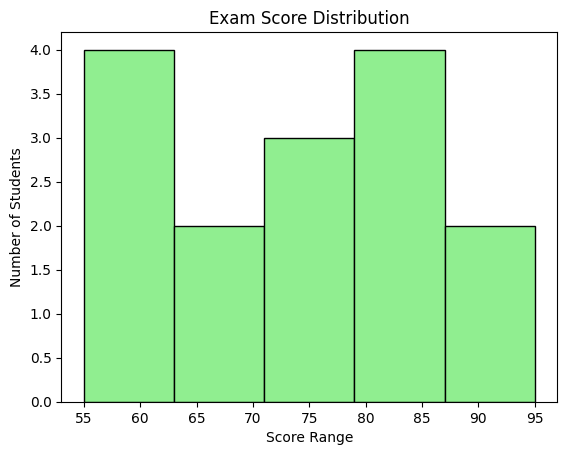

In [4]:
# Example: Exam scores
scores = [55, 60, 61, 62, 65, 70, 71, 72, 73, 80, 85, 85, 86, 90, 95]

plt.hist(scores, bins=5, color='lightgreen', edgecolor='black')
plt.title("Exam Score Distribution")
plt.xlabel("Score Range")
plt.ylabel("Number of Students")
plt.show()


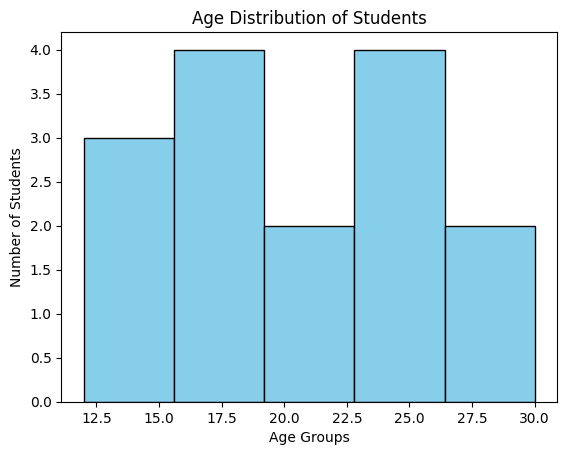

In [9]:
import matplotlib.pyplot as plt

ages = [12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 25, 25, 26, 28, 30]

plt.hist(ages, bins=5, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Students")
plt.xlabel("Age Groups")
plt.ylabel("Number of Students")
plt.show()


4. Scatter Plot

What it shows: Relationship between two variables.

When to use: Height vs Weight, Hours studied vs Exam score.

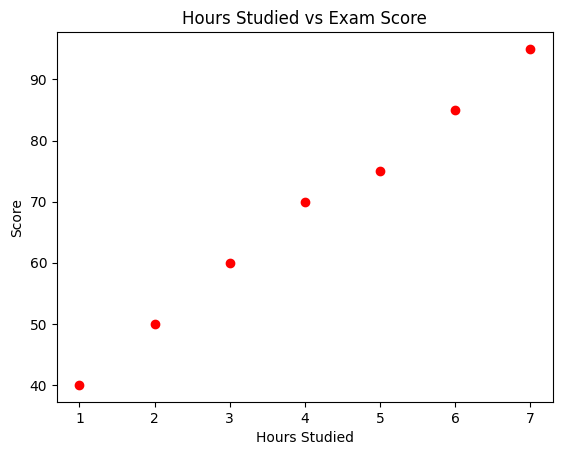

In [5]:
# Example: Hours studied vs Exam scores
hours = [1, 2, 3, 4, 5, 6, 7]
scores = [40, 50, 60, 70, 75, 85, 95]

plt.scatter(hours, scores, color='red')
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()


5. Pie Chart

What it shows: Proportions (part of a whole).

When to use: Market share, budget allocation.

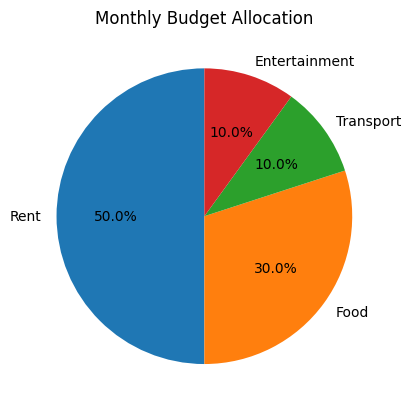

In [6]:
# Example: Budget allocation
categories = ["Rent", "Food", "Transport", "Entertainment"]
amounts = [500, 300, 100, 100]

plt.pie(amounts, labels=categories, autopct="%1.1f%%", startangle=90)
plt.title("Monthly Budget Allocation")
plt.show()


6. Box Plot (Whisker Plot)

What it shows: Spread, median, and outliers.

When to use: Salary distribution, exam marks.

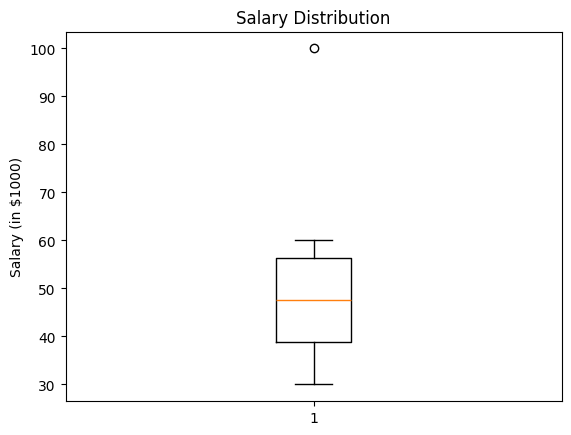

In [7]:
# Example: Salaries
salaries = [30, 35, 40, 45, 50, 55, 60, 100]  # 100 is an outlier

plt.boxplot(salaries)
plt.title("Salary Distribution")
plt.ylabel("Salary (in $1000)")
plt.show()
